In [6]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [7]:
pima = pd.read_excel("./Train.xlsx", index_col=None, header=None)
pima.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1,1
1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0,1
2,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1,2
3,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,2
4,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1,2


# lets delete missing values (0)
داده های از دست رفته را با مد در هر ستون جایگزین میکنیم

In [8]:
from sklearn.impute import SimpleImputer 
imr = SimpleImputer(missing_values=0, strategy='most_frequent')#Stategies:median(ordinal),most_frequent(nominal)
imr = imr.fit(pima)
imputed_data = imr.transform(pima.values)
imputed_data

array([[-1,  1, -1, ..., -1,  1,  1],
       [-1,  1, -1, ..., -1,  1,  1],
       [-1,  1,  1, ..., -1, -1,  2],
       ...,
       [ 1,  1,  1, ...,  1,  1,  2],
       [-1,  1, -1, ...,  1,  1,  2],
       [-1,  1,  1, ...,  1,  1,  2]], dtype=int64)

# translating new array to new Dataset by name pima

In [9]:
pima= pd.DataFrame(data=imputed_data, index=None)
pima

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1,1,-1,1,1,1,-1,-1,-1,1,-1,1,1,1,-1,1,1
1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,1,1
2,-1,1,1,-1,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1,2
3,-1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,2
4,1,1,1,-1,1,1,-1,-1,-1,-1,1,-1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-1,1,-1,1,1,1,1,1,-1,1,-1,1,-1,1,-1,1,1
296,-1,-1,1,1,1,1,-1,-1,-1,1,-1,1,1,1,1,1,1
297,1,1,1,-1,-1,1,1,1,1,1,-1,-1,-1,-1,1,1,2
298,-1,1,-1,-1,-1,-1,1,1,1,1,1,-1,-1,-1,1,1,2


we choose the col[16] of this dataset as target
and lets make new dataset by name data to use 15 cols and target that are joined together

In [10]:
#Feature selection
#split dataset in features and target variable
feature_cols = [0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 ]
X = pima[feature_cols] # Features
y = pima[16] # Target variable
data= X.join(y)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1,1,-1,1,1,1,-1,-1,-1,1,-1,1,1,1,-1,1,1
1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,1,1
2,-1,1,1,-1,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1,2
3,-1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,2
4,1,1,1,-1,1,1,-1,-1,-1,-1,1,-1,1,1,1,1,2


# lets train with 70% of our data , then test with 30%

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# feature selection : its better to do the calculate by choosing the best features(cols)

featureimportance is the Function that could tell us how much  important is each col or feature 

In [2]:
def featureimportance(node):
    nodesum = sum(node.values())
    percents = {c:v/nodesum for c,v in node.items()}
    return nodesum, percents

but lets calculate the importance of each col in a professional style

In [12]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
feat_labels = data.columns[:15]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1) 
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))

 1) 0                              0.341887
 2) 1                              0.171927
 3) 2                              0.122681
 4) 3                              0.083523
 5) 4                              0.061917
 6) 5                              0.041853
 7) 6                              0.040096
 8) 7                              0.034054
 9) 8                              0.025145
10) 9                              0.021181
11) 10                             0.016247
12) 11                             0.012742
13) 12                             0.007821
14) 13                             0.007310
15) 14                             0.006847


IndexError: index 15 is out of bounds for axis 0 with size 15

we can show the importances to deliver the point much better

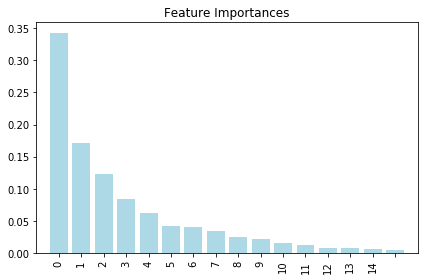

In [13]:
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]),feat_labels, rotation=90)                                    
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

so lets select the best features 

In [105]:
#Feature selection again
#split dataset in features and target variable agian
feature_cols2 = [0, 1, 2, 3 , 4]
X1 = pima[feature_cols2] # Features
y1 = pima[16] # Target variable
data= X1.join(y1)
data.head()

,0,1,2,3,4,16
0,-1,1,-1,1,1,1
1,-1,1,-1,1,1,1
2,-1,1,1,-1,1,2
3,-1,1,1,-1,-1,2
4,1,1,1,-1,1,2


training again

In [106]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1) # 70% training and 30% test

# using entropy : without final feature selection : DecisionTreeClassifier


entropyscore Fucntion is showing us the algorithm of calculation entropy score

In [16]:
def entropyscore(node):
    nodesum, percents = calcpercent(node)
    score = round(sum([-i*log(i,2) for i in percents.values()]), 3)
    return score

lets calculate Accuracy of Model without final feature selection and using entropy

In [128]:
#Building Decision Tree Model without final feature selection
# Create Decision Tree classifer object
dd = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
dd = dd.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dd.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


# using gini : without final feature selection : DecisionTreeClassifier

giniscore Fucntion is showing us the algorithm of calculation gini score

In [ ]:
def giniscore(node):
    nodesum, percents = calcpercent(node)
    score = round(1 - sum([i**2 for i in percents.values()]), 3)
    return score

In [49]:
#Building Decision Tree Model without final feature selection
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


[Text(123.08823529411765, 195.696, 'X[3] <= 0.0\nentropy = 0.955\nsamples = 210\nvalue = [79, 131]'),
 Text(59.082352941176474, 152.208, 'X[2] <= 0.0\nentropy = 0.067\nsamples = 126\nvalue = [1, 125]'),
 Text(39.38823529411765, 108.72, 'X[0] <= 0.0\nentropy = 0.439\nsamples = 11\nvalue = [1, 10]'),
 Text(19.694117647058825, 65.232, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(59.082352941176474, 65.232, 'X[4] <= 0.0\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(39.38823529411765, 21.744, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(78.7764705882353, 21.744, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(78.7764705882353, 108.72, 'entropy = 0.0\nsamples = 115\nvalue = [0, 115]'),
 Text(187.09411764705882, 152.208, 'X[2] <= 0.0\nentropy = 0.371\nsamples = 84\nvalue = [78, 6]'),
 Text(118.16470588235295, 108.72, 'X[1] <= 0.0\nentropy = 0.107\nsamples = 71\nvalue = [70, 1]'),
 Text(98.47058823529412, 65.232, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0]'),
 T

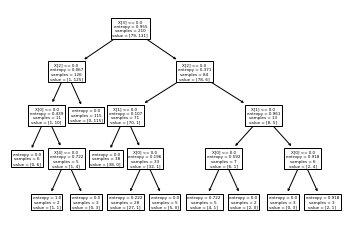

In [130]:
from sklearn import tree
tree.plot_tree(clf) 


# using entropy : with final feature selection : DecisionTreeClassifier

In [117]:
#Building Decision Tree Model with final feature selection
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X1_train,y1_train)

#Predict the response for test dataset
y1_pred = clf.predict(X1_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.9555555555555556


# returning tree for entropy

[Text(123.08823529411765, 195.696, 'X[3] <= 0.0\nentropy = 0.955\nsamples = 210\nvalue = [79, 131]'),
 Text(59.082352941176474, 152.208, 'X[2] <= 0.0\nentropy = 0.067\nsamples = 126\nvalue = [1, 125]'),
 Text(39.38823529411765, 108.72, 'X[0] <= 0.0\nentropy = 0.439\nsamples = 11\nvalue = [1, 10]'),
 Text(19.694117647058825, 65.232, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(59.082352941176474, 65.232, 'X[4] <= 0.0\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(39.38823529411765, 21.744, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(78.7764705882353, 21.744, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(78.7764705882353, 108.72, 'entropy = 0.0\nsamples = 115\nvalue = [0, 115]'),
 Text(187.09411764705882, 152.208, 'X[2] <= 0.0\nentropy = 0.371\nsamples = 84\nvalue = [78, 6]'),
 Text(118.16470588235295, 108.72, 'X[1] <= 0.0\nentropy = 0.107\nsamples = 71\nvalue = [70, 1]'),
 Text(98.47058823529412, 65.232, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0]'),
 T

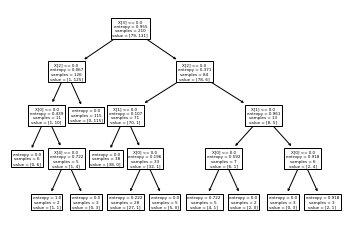

In [118]:
from sklearn import tree

tree.plot_tree(clf) 


# using gini :with  final feature selection : DecisionTreeClassifier

In [114]:
#Building Decision Tree Model with final feature selection
# Create Decision Tree classifer object
dd = DecisionTreeClassifier(criterion="gini", max_depth=4)

# Train Decision Tree Classifer
dd = dd.fit(X1_train,y1_train)

#Predict the response for test dataset
y_pred = dd.predict(X1_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.9555555555555556


[Text(123.08823529411765, 195.696, 'X[3] <= 0.0\ngini = 0.469\nsamples = 210\nvalue = [79, 131]'),
 Text(59.082352941176474, 152.208, 'X[2] <= 0.0\ngini = 0.016\nsamples = 126\nvalue = [1, 125]'),
 Text(39.38823529411765, 108.72, 'X[0] <= 0.0\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(19.694117647058825, 65.232, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(59.082352941176474, 65.232, 'X[4] <= 0.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(39.38823529411765, 21.744, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(78.7764705882353, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(78.7764705882353, 108.72, 'gini = 0.0\nsamples = 115\nvalue = [0, 115]'),
 Text(187.09411764705882, 152.208, 'X[2] <= 0.0\ngini = 0.133\nsamples = 84\nvalue = [78, 6]'),
 Text(118.16470588235295, 108.72, 'X[1] <= 0.0\ngini = 0.028\nsamples = 71\nvalue = [70, 1]'),
 Text(98.47058823529412, 65.232, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(137.85882352941178, 65.232, 'X

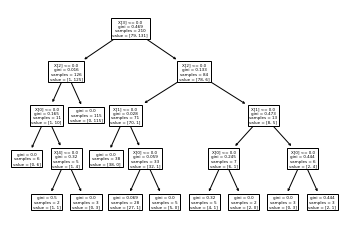

In [115]:
from sklearn import tree

tree.plot_tree(dd) 
